In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [2]:
# convert 2 vectors into a heatmap
def densitymap(x, y, xDensityCenters, yDensityCenters, sigma):
    if len(x) != len(y):
        return "inconsistent size of x and y vectors"
    # Ensure sigma is a scalar
    sigma_sq_inv = (1/np.asarray(sigma))**2
    
    mat = np.zeros((len(yDensityCenters), len(xDensityCenters)))
    
    for i, center_x in enumerate(xDensityCenters):
        for j, center_y in enumerate(yDensityCenters):
            dist_sq = (x - center_x)**2 + (y - center_y)**2
            mat[j, i] = np.sum(np.exp(-0.5 * dist_sq * sigma_sq_inv))
    
    # Normalize the kernel
    mat /= np.sum(mat)
    
    return mat

In [3]:
# convert 2 vectors into a heatmap for mutation data
def mutation_densitymap(x, y, xDensityCenters, yDensityCenters, sigma):
    if len(x) != len(y):
        return "inconsistent size of x and y vectors"
    # Ensure sigma is a scalar
    sigma_sq_inv = (1/np.asarray(sigma))**2
    
    mat = np.zeros((len(yDensityCenters), len(xDensityCenters)))
    
    for j, center_y in enumerate(yDensityCenters):
        dist_sq = (y[x==0] - center_y)**2
        mat[j, 0] = np.sum(np.exp(-0.5 * dist_sq * sigma_sq_inv))
    for j, center_y in enumerate(yDensityCenters):
        dist_sq = (y[x==1] - center_y)**2
        mat[j, 1] = np.sum(np.exp(-0.5 * dist_sq * sigma_sq_inv))
    
    # Normalize the kernel
    mat /= np.sum(mat)
    
    return mat

In [18]:
# extracts a specific gene and creates density centers
def extract(df1, df2, gene_name, std, boxes):
    df = pd.concat([df1[df1.iloc[:, 0] == gene_name].iloc[:, 1:], 
                    df2[df2.iloc[:, 0] == gene_name].iloc[:, 1:]])
    
    # drop NaN
    df.dropna(axis=1, inplace=True)
    x = df.iloc[0]
    y = df.iloc[1]
    
    # find median standard deviation
    xstd = df1.std(axis=1, numeric_only=True).median()
    ystd = df2.std(axis=1, numeric_only=True).median()
    
    # set values greater than max in graph to be max or values less than min in graph to be min
    x[x > xstd*std] = xstd*std
    y[y > ystd*std] = ystd*std
    x[x < -xstd*std] = -xstd*std
    y[y < -ystd*std] = -ystd*std
    
    # create matrix points
    xd = np.linspace(-xstd*std,xstd*std, endpoint=True, num=boxes)
    yd = np.linspace(-ystd*std,ystd*std, endpoint=True, num=boxes)
    
    return x, y, xd, yd

In [5]:
# extracts a specific gene and creates density centers for mutation data
def mutation_extract(mut, df1, gene_name, std, boxes):
    df = pd.concat([mut[mut.iloc[:, 0] == gene_name].iloc[:, 1:], 
                    df1[df1.iloc[:, 0] == gene_name].iloc[:, 1:]])
    
    # drop NaN
    df.dropna(axis=1, inplace=True)
    x = df.iloc[0]
    y = df.iloc[1]
    
    # find median standard deviation
    df_std = df1.std(axis=1, numeric_only=True).median()
    
    # set values greater than max in graph to be max or values less than min in graph to be min
    y[y > df_std*std] = df_std*std
    y[y < -df_std*std] = -df_std*std
    
    # create matrix points
    xd = [0,1]
    yd = np.linspace(-df_std*std,df_std*std, endpoint=True, num=boxes)
    
    return x, y, xd, yd

In [6]:
[0.25,0.75,1.25,1.75,2.25,3.25]

[0.25, 0.75, 1.25, 1.75, 2.25, 3.25]

In [7]:
def dropna(s1, s2):
    df = pd.concat([s1, s2])
    df.dropna(axis=1, inplace=True)
    return df.iloc[0], df.iloc[1]

In [8]:
shRNA_t = pd.read_csv(r"C:\Users\justi\Coding\Project\Han Xu\Trimmed data\1shRNA_t")
gene_exp_n = pd.read_csv(r"C:\Users\justi\Coding\Project\Han Xu\Trimmed data\1gene_exp_n")


In [9]:
shRNA_t

,Unnamed: 0,143B_BONE,22RV1_PROSTATE,2313287_STOMACH,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,...,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
0,A1BG,0.668865,0.137563,0.563500,0.407828,-0.085012,-0.378410,-0.122246,0.059608,0.594396,...,0.529830,-0.684247,0.248592,0.155388,0.589643,1.137463,-0.171007,-0.367834,-0.001838,-0.553530
1,A1CF,-0.509562,-1.307328,0.232273,1.173509,-1.144923,-0.170096,2.225973,-0.091072,-0.175562,...,-0.422814,-2.264726,-0.239732,-2.279778,0.216230,-2.425942,0.511213,1.406026,-0.160431,-1.066889
2,A2M,-0.261082,-0.193665,0.334944,0.077275,0.051528,0.202445,-0.220164,0.424465,0.459323,...,0.168103,0.419712,0.609845,1.260653,-0.476685,0.442686,0.180620,0.416939,0.500914,1.367999
3,A2ML1,-0.366804,0.457342,0.281390,0.463284,-0.733364,-0.687812,-0.348345,0.309870,0.563500,...,0.169529,0.789282,0.423673,0.353363,-0.441035,-0.233830,0.056519,-0.662857,0.940200,0.514778
4,A4GALT,-0.345850,-0.061562,0.270695,-0.974595,-0.375915,0.159428,0.950499,0.219755,-0.475101,...,-0.139596,0.222766,0.454966,0.738184,0.339183,-0.012991,0.058895,-0.299465,0.104131,-0.012005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,ZXDC,0.628066,NaN,-0.126722,NaN,-0.164352,NaN,NaN,NaN,NaN,...,-0.039934,0.768685,0.024477,-0.469159,-0.121612,0.334984,-0.576109,NaN,0.011932,NaN
15967,ZYG11A,0.043566,NaN,-0.497679,NaN,-0.025068,NaN,NaN,NaN,NaN,...,-0.185267,0.308643,0.702930,1.426623,-0.431925,-0.104104,0.326705,NaN,-0.595518,NaN
15968,ZYX,-0.023310,0.438725,0.001883,0.288916,-0.172473,-0.957959,-0.015910,0.924752,1.493170,...,-0.334244,1.532781,-0.100618,0.756009,1.109339,0.340212,1.288777,-0.338562,-0.440243,0.482297
15969,ZZEF1,-1.232859,-1.092240,1.117658,0.605883,-1.962494,-0.942907,1.118054,1.816396,-0.234583,...,-0.085764,-1.263359,-0.832392,-1.385757,-0.082991,-0.801099,-0.589180,2.204979,-1.340205,-1.355653


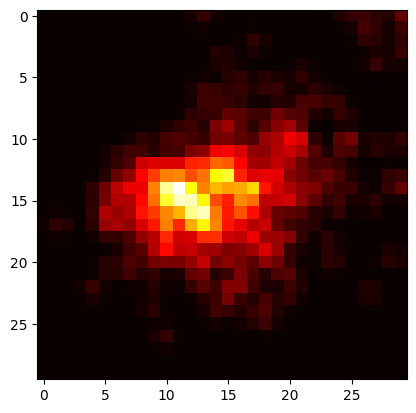

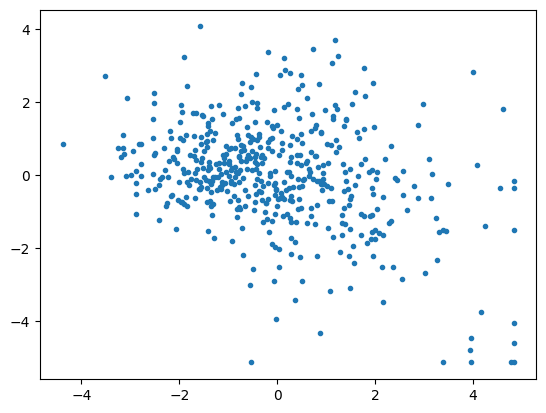

In [12]:
x, y, xd, yd = extract(shRNA_t, gene_exp_n, 'MYC', 7, 30)
mat = densitymap(x,y,xd,yd,0.2)

# show heatmap
plt.imshow(mat, cmap='hot', interpolation='nearest')
plt.show()
# show scatterplot
plt.scatter(x,y,marker='.')
plt.show()

In [15]:
npmat

array([[5.44095515e-104, 4.77208441e-089, 2.60833710e-075,
        8.88468323e-063, 1.88600486e-051, 2.49497557e-041,
        2.05689639e-032, 1.05677167e-024, 3.38354954e-018,
        6.75128663e-013, 8.39504798e-009, 6.50552647e-006,
        3.14169733e-004, 9.45515968e-004, 1.77335648e-004,
        2.07339520e-006, 5.82802230e-008, 3.12837606e-007,
        1.07433973e-007, 2.29925452e-009, 3.06664311e-012,
        6.33702751e-012, 4.36466417e-008, 1.87352842e-005,
        5.01671365e-004, 9.24700102e-004, 1.08472059e-003,
        7.15824244e-004, 6.48652913e-004, 1.90746537e-003],
       [1.29931268e-099, 9.96094762e-090, 5.44256032e-076,
        1.85387941e-063, 3.93534073e-052, 5.20601997e-042,
        4.29192326e-033, 2.20506145e-025, 7.06011985e-019,
        1.40872454e-013, 1.75171204e-009, 1.35744419e-006,
        6.55547360e-005, 1.97298009e-004, 3.70916196e-005,
        6.67918659e-007, 1.41593669e-005, 7.80031159e-005,
        2.67876527e-005, 5.73297530e-007, 7.64731735e-0